In [1]:
!pip install bs4==0.0.1

In [2]:
!pip install bs4==0.0.1

In [3]:
import pandas as pd 
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
page = requests.get("https://www.imdb.com/list/ls066247137/")
soup = BeautifulSoup(page.content, "html.parser")

movie_names = []
movies_parent =  soup.find_all('h3', class_ = 'lister-item-header')
for movie_name in movies_parent:
    movie_names.append(movie_name.find_all('a')[0].get_text())

descriptions = soup.find_all('p', class_= "")[1::2]
descriptions = [description.get_text().strip() for description in descriptions]

In [5]:
release_dates = soup.find_all('span', class_ = 'lister-item-year text-muted unbold')
release_years = [release_date.get_text() for release_date in release_dates]

movies =  soup.find_all('div', class_ = 'lister-item-content')

all_movies_info = []
for movie in movies:
    all_movies_info.append(movie.find_all('p', class_ = 'text-muted text-small'))

# print("Number of movies: ", len(movies_info))

director_names = []
for single_movie_info in all_movies_info:
    
    for markup_info in single_movie_info:

        markup_string = markup_info.get_text().split()
        
        if "Director:" in markup_string:
            director = markup_string[markup_string.index("Director:") + 1 : markup_string.index("Stars:") - 1]
            director = " ".join(director)
            director_names.append(director)
        
        elif "Directors:" in markup_string:
            directors = markup_string[markup_string.index("Directors:") + 1 : markup_string.index("Stars:") - 1]
            directors = " ".join(directors)
            director_names.append(directors)

In [6]:
Ratings = []
ratings_raw = soup.find_all("span",class_='ipl-rating-star__rating')
for i in range(0,len(ratings_raw),23):
    Ratings.append(float(ratings_raw[i].text))

Duration = []
duration_raw = soup.find_all("span",class_='runtime')
for i in range(100):
    Duration.append(duration_raw[i].text)

In [7]:
genres = soup.find_all('span', class_ ="genre")

genres_text = []
for t in genres:
    genres_text.append(t.text.strip())

In [8]:
star_names = []
for single_movie_info in all_movies_info:
    
    for markup_info in single_movie_info:

        markup_string = markup_info.get_text().split()

        if "Stars:" in markup_string:
            star = markup_string[markup_string.index("Stars:") + 1 :]
            star = " ".join(star)
            star_names.append(star)
            # print(star)

In [9]:
data = {'Movie': movie_names,  
        'Description': descriptions, 
        "Release-Date": release_years,
        "Directors": director_names,
        "Rating": Ratings, 
        "Duration": Duration,
        "Genre" : genres_text,
        "Stars": star_names,
        }
df = pd.DataFrame(data)
df

,Movie,Description,Release-Date,Directors,Rating,Duration,Genre,Stars
0,The Lord of the Rings: The Fellowship of the Ring,A meek Hobbit from the Shire and eight compani...,(2001),Peter Jackson,8.8,178 min,"Action, Adventure, Drama","Elijah Wood, Ian McKellen, Orlando Bloom, Sean..."
1,Final Fantasy: The Spirits Within,A scientist makes a last stand on Earth with t...,(2001),"Hironobu Sakaguchi, Motonori Sakakibara",6.4,106 min,"Animation, Action, Adventure","Alec Baldwin, Steve Buscemi, Ming-Na Wen, Ving..."
2,X2: X-Men United,When anti-mutant Colonel William Stryker kidna...,(2003),Bryan Singer,7.4,134 min,"Action, Sci-Fi, Thriller","Patrick Stewart, Hugh Jackman, Halle Berry, Ia..."
3,Harry Potter and the Goblet of Fire,Harry Potter finds himself competing in a haza...,(2005),Mike Newell,7.7,157 min,"Adventure, Family, Fantasy","Daniel Radcliffe, Emma Watson, Rupert Grint, E..."
4,Mortal Kombat,Three unknowing martial artists are summoned t...,(1995),Paul W.S. Anderson,5.8,101 min,"Action, Adventure, Fantasy","Christopher Lambert, Robin Shou, Linden Ashby,..."
...,...,...,...,...,...,...,...,...
95,The Tale of The Princess Kaguya,Found inside a shining stalk of bamboo by an o...,(2013),Isao Takahata,8.0,137 min,"Animation, Adventure, Drama","Chloë Grace Moretz, James Caan, Mary Steenburg..."
96,Hansel and Gretel,Based on the fairy tale by The Brothers Grimm....,(1987),Len Talan,6.7,84 min,"Family, Fantasy, Musical","David Warner, Hugh Pollard, Nicola Stapleton, ..."
97,Ariana's Quest,Princess Ariana fights for the return of her l...,(2002 TV Movie),Lloyd A. Simandl,4.5,94 min,"Action, Fantasy","Rena Lesnar, Anthony De Longis, Katerina Brozo..."
98,New Nightmare,A demonic force has chosen Freddy Krueger as i...,(1994),Wes Craven,6.5,112 min,"Fantasy, Horror, Mystery","Heather Langenkamp, Robert Englund, Jeff Davis..."


In [46]:
type(df['Stars'])

pandas.core.series.Series

In [10]:
# "Release-Date":[1999,2000,2001],
#         "Directors":["Peter Jackson", "David Lynch", "Guillermo del Torro"],
#         "Rating":[8, 9, 10], 
#         "Duration":[2,3,4],
#         "Genre":["Fantasy", "Drama", "Action"], 
#         "Stars":["Sean Bean died", "Brad Pitt, Angelina Jolie", "James McAvoy, Jennifer Lawrenece"]

<BarContainer object of 10 artists>

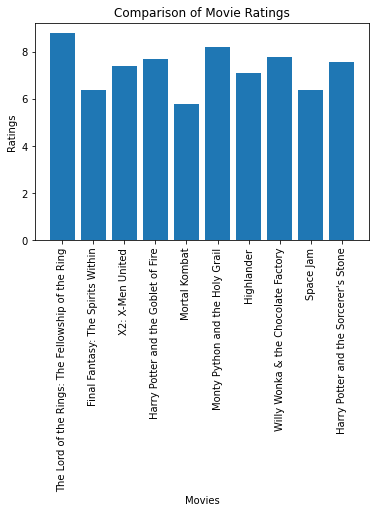

In [11]:

#import seaborn; seaborn.set()

plt.title('Comparison of Movie Ratings')
plt.xlabel('Movies')
plt.ylabel('Ratings')
plt.xticks(rotation=90)

plt.bar(df['Movie'][0:10], df['Rating'][0:10])

![Picture title](image-20210604-142947.png)

In [54]:
Norm_rating = []
for i in range(len(Ratings)):
    Norm_rating.append((Ratings[i]-min(Ratings))/(max(Ratings)-min(Ratings)))
    #print(str(Ratings[i])+'  '+str(Norm_rating[i]))


Norm_d = []
for i in range(len(Duration)):
    Norm_d.append(float(Duration[i].split()[0]))
Norm_duration = []
for i in range(len(Norm_d)):
    Norm_duration.append(round((Norm_d[i]-min(Norm_d))/(max(Norm_d)-min(Norm_d)),2))


Norm_rating_mean = []
for i in range(len(Ratings)):
    Norm_rating_mean.append( round((Ratings[i]-(sum(Ratings)/len(Ratings)))/(max(Ratings)-min(Ratings)),2))


Norm_duration_mean = []
for i in range(len(Norm_d)):
    Norm_duration_mean.append(round((Norm_d[i]-(sum(Norm_d)/len(Norm_d)))/(max(Norm_d)-min(Norm_d)),2))
Norm_duration_mean



-0.32
0.68


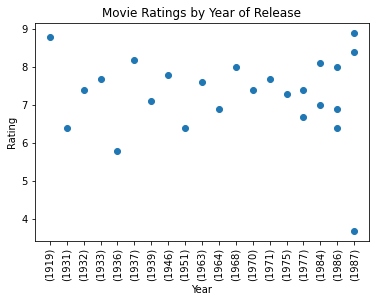

In [30]:
plt.title('Movie Ratings by Year of Release')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.xticks(rotation=90)





plt.scatter(df['Release-Date'].sort_values(ascending=True)[0:25], df['Rating'][0:25])
# plt.hist(df['Rating'])

In [107]:
# for director in df['Directors']
# directors_single = []
# for director in df['Directors']:
#     directors_single.append(director.split(','))

# directors_single[0:5]
# extract all comma separated names from pandas series 
# (https://stackoverflow.com/questions/41244981/how-to-extract-comma-separated-values-to-individual-rows-in-pandas)

df_directors = df[['Directors', 'Movie']]
df_directors.Directors = df.Directors.str.split(', ')
df_directors = df_directors.explode('Directors').reset_index(drop=True)
# df_directors
count_directors = df_directors.groupby('Directors').count()

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:xlabel='Directors'>

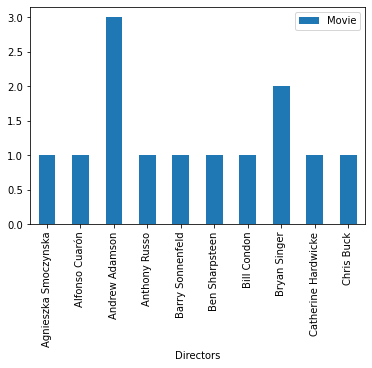

In [155]:
x_directors = count_directors.index
y_directors = count_directors.index.values
count_directors[0:10].plot.bar()


alt.Chart(...)

In [82]:
# df_directors = df['Directors'].str.split(',', expand = True)
# type(df['Stars']) -> Series
# df_stars = df['Stars'].str.split(',', expand = True) -> ???

#df_stars = df[['Stars', 'Movie']]
#df_stars.Stars = df.Stars.str.split(', ')
#df_stars = df_stars.explode('Stars').reset_index(drop=True)

#extract all comma separated names from pandas series


df_stars = df[['Stars', 'Movie']]
df_stars.Stars = df.Stars.str.split(', ')
df_stars = df_stars.explode('Stars').reset_index(drop=True)

# df_stars = df['Stars'].str.split(',', expand = True)
#print(df_stars)

#counter = df_stars.groupby('S').count()
# print(counter)


#for a in df_stars:
#    for b in df_stars:
#        if a != b:
#            names.append(a)

#print(names)


        
counter = 0

#for n in df_stars:
#    for i in df_stars:
#        if n == i:
#            amount.append(n[counter =+ 1 ])



#plt.title('Number of movies in top 100 / actor')
#plt.xlabel('Actor')
#plt.ylabel('Amount of movies')
#plt.ticks(rotation = 90)
            

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [157]:
df_stars = df[['Stars', 'Movie']]
df_stars.Stars = df.Stars.str.split(', ')
df_stars = df_stars.explode('Stars').reset_index(drop=True)

#print(df_stars)
count = df_stars.groupby('Stars').count()
sort = count.sort_values('Movie', ascending = False)
print(sort)



                     Movie
Stars                     
Rupert Grint             8
Daniel Radcliffe         8
Emma Watson              7
Christopher Lambert      4
Chloë Grace Moretz       4
...                    ...
Isaac Hayes              1
Idris Elba               1
Idina Menzel             1
Hugh Pollard             1
Zoe McLellan             1

[336 rows x 1 columns]
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:xlabel='Stars'>

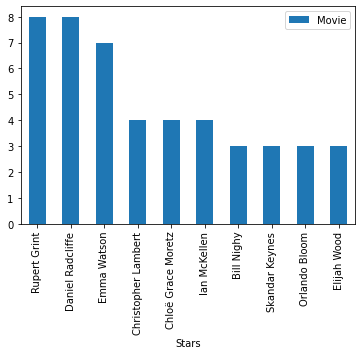

In [159]:
sort[0:10].plot.bar()

In [ ]:
plt.title('Number of movies in top 100 / actor')
plt.xlabel('Actor')
plt.ylabel('Amount of movies')
plt.xticks(rotation = 90)

type(df_stars)
allnumbers = sort.values.tolist()

# type(sort['Stars'])
#type(count)
# plt.plot(sort['Stars'], sort['Movies'])
plt.bar[sort['Stars'],allnumbers]

In [133]:
print(sort)

                     Movie
Stars                     
Rupert Grint             8
Daniel Radcliffe         8
Emma Watson              7
Christopher Lambert      4
Chloë Grace Moretz       4
...                    ...
Isaac Hayes              1
Idris Elba               1
Idina Menzel             1
Hugh Pollard             1
Zoe McLellan             1

[336 rows x 1 columns]


In [ ]:
sort.type

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=67a060c6-2ca9-43eb-ab8a-e0db5e43f744' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>